# Introduction to GIS with Python
*Francisco Garrido-Valenzuela (f.garridov@tudelft.nl), TU Delft, 2024*

## What is GIS?

GIS stands for Geographic Information System. It is a system for working with geographic information. This allows you to create maps and analyze spatial data. 

GIS is a term that can refer to a number of different technologies, processes, and methods. It is attached to many operations and has many applications related to engineering, planning, management, transport/logistics, insurance, telecommunications, and business. For that reason, GIS and location intelligence applications can be the foundation for many location-enabled services that rely on **analysis** and **visualization**.

## Projections in GIS

Because GIS works with geographic information, which is on the surface of the earth, it is important to represent the earth in a way that is useful for analysis. The earth is a sphere, but it is often represented as a flat surface. This is called a **projection**. There are many different projections, and each has its own advantages and disadvantages.

One example of a projection is the Mercator projection. This is a cylindrical projection, which means that the earth is projected onto a cylinder (see the next Figure). The cylinder is then unrolled to create a flat surface. This projection is very useful because it preserves angles and shapes, which makes it good for spatial analysis. However, it distorts the size of objects as you move away from the tangent line.

<p align="center">
  <img src="source/cylindrical_final.gif" width="400" title="Map Projection">
</p>

### EPSG (CRS)

The EPSG Geodetic Parameter Dataset is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application.

#### Global system

An example for global system is **EPSG:4326**, which is the latitude-longitude system. When you look for addresses on Google Maps, you are using this system. Here in Delft the coordinates are around latitude :52.013923 and longitude 4.355359. Latitude is from South to North and longitude is from West to East (see Figure below).

In GIS, we represent the coordinates in the following way: **(longitude, latitude)**. This is in the other way around compared to Google Maps. This follows the mathematical convention of (x,y) coordinates.

For local analysis, it is preferable to use a local system. The lat/long system do not considers the deformation of the earth and the coordinates are not in meters. For example, if you want to calculate the distance between two points, you need to use a local system.

<p align="center">
  <img src="source/Lat_Long.gif" width="400" title="Latitudes and longitudes">  
</p>

#### Local system

An example for local system is **EPSG:28992**, which is the Dutch system. The coordinates are in meters and the deformation of the earth is considered. The coordinates of Delft are around x: 100000 and y: 450000. The origin of the system is in the South-West of the Netherlands (Amersfoort).

<p align="center">
  <img src="source/UTM-Secant-Tangent-Cylinder-2-425x278.png" width="400" title="Projection">
</p>

## GIS Geometries

The most common GIS geometries are **points**, **lines** and **polygons** (see the Figure below). These are the basic building blocks of GIS. In Gis we work with layers. Each layer has a *unique geometry* type. For example, a layer can be a point layer, a line layer or a polygon layer. 

<p align="center">
  <img src="source/3_3_4_geometries_9_en.png" width="500" title="Geometries">
</p>

Each layer has a **CRS** (Coordinate Reference System). The CRS defines the projection of the layer. For example, a layer can be in the Dutch CRS (**EPSG:28992**) or in the global CRS (EPSG:4326). It is important to use same CRS for all the layers in your analysis. If you use different CRS, you need to transform the layers to the same CRS.

## GIS Metadata

Each layer has a set of attributes. These attributes are called **metadata**. The metadata can be the name of the layer, the CRS, the date of creation, the author, etc. The metadata can also be the attributes of the geometries. For example, if you have a point layer of cities, the metadata can be the name of the city, the population, the area, etc.

## GIS Operations

GIS allows you to perform many different operations. Some of the most common operations are: **Buffer**, **Intersection**, **Union**, **Difference**, **Symmetric Difference**.


With these operations you can create new layers from existing layers. For example, you can create a buffer around a point layer. You can also create a new layer from the intersection of two layers.

<p align="center">
  <img src="source/5c7eb6fc4bcbfc5117d778f0aabfded6.jpg" width="500" title="GIS Operations Buffer">
</p>

<p align="center">
  <img src="source/sddefault.jpg" width="500" title="GIS Operations Others">
</p>

## GIS in Python

There are some Python libraries for GIS. The most common and widely used is **geopandas**. Geopandas is a library that extends the functionalities of **pandas**. It allows you to work with spatial data in a similar way as you work with tabular data in pandas. Go to the First Cell to see how to work with geopandas.

### Figure references

- [Map Projection](https://www.acsu.buffalo.edu/~dbertuca/maps/cat/map-projections.html)
- [Latitudes and longitudes](https://journeynorth.org/tm/LongitudeIntro.html)
- [Projection](https://gisgeography.com/utm-universal-transverse-mercator-projection/)
- [Geometries](https://cartong.pages.gitlab.cartong.org/learning-corner/en/3_key_gis_concepts/3_3_key_concepts/3_3_4_geometries)
- [GIS Operations Buffer](https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/s11-01-single-layer-analysis.html)
- [GIS Operations Others](https://geopandas.org/en/stable/docs/user_guide/set_operations.html)

In [1]:
import geopandas as gpd
from pathlib import Path

data_path = Path('data/Delft_NL')

# Load data
boundary = gpd.read_file(data_path / 'boundary/boundary.geojson')
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
network = gpd.read_file(data_path / 'network/edges/edges.geojson')
cells = gpd.read_file(data_path / 'cells/cells.geojson')

In [3]:
panoids.head()

,panoid,year,month,owner,lat,lng,ask_lng,ask_lat,consulted,dist,angle,url_side_a,url_front,url_side_b,url_back,im_side_a,im_front,im_side_b,im_back,geometry
0,Z5qJau_sr_GhMWL86nmdPw,2009,9,Google,51.970324,4.359441,4.359873,51.970418,1,21.508589,59.398,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_0_s_a.png,image_0_f.png,image_0_s_b.png,image_0_b.png,POINT (4.35944 51.97032)
1,W7NL3JnSXtQjP-gXx2Y8eA,2014,7,Google,51.970346,4.359419,4.359873,51.970418,1,21.983408,63.045,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_1_s_a.png,image_1_f.png,image_1_s_b.png,image_1_b.png,POINT (4.35942 51.97035)
2,_NsoIOl5Z2-9YM162biiuw,2016,7,Google,51.970301,4.359453,4.359873,51.970418,1,21.900022,55.545,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_2_s_a.png,image_2_f.png,image_2_s_b.png,image_2_b.png,POINT (4.35945 51.97030)
3,F8tYIBLMCAPAcBL40tinnw,2019,3,Google,51.970333,4.359424,4.359873,51.970418,1,22.222923,61.282,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_3_s_a.png,image_3_f.png,image_3_s_b.png,image_3_b.png,POINT (4.35942 51.97033)
4,HfqVNVb-mxOlJSNJFTCLyA,2021,3,Google,51.970351,4.359424,4.359873,51.970418,1,21.456919,63.598,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...,image_4_s_a.png,image_4_f.png,image_4_s_b.png,image_4_b.png,POINT (4.35942 51.97035)


<Axes: >

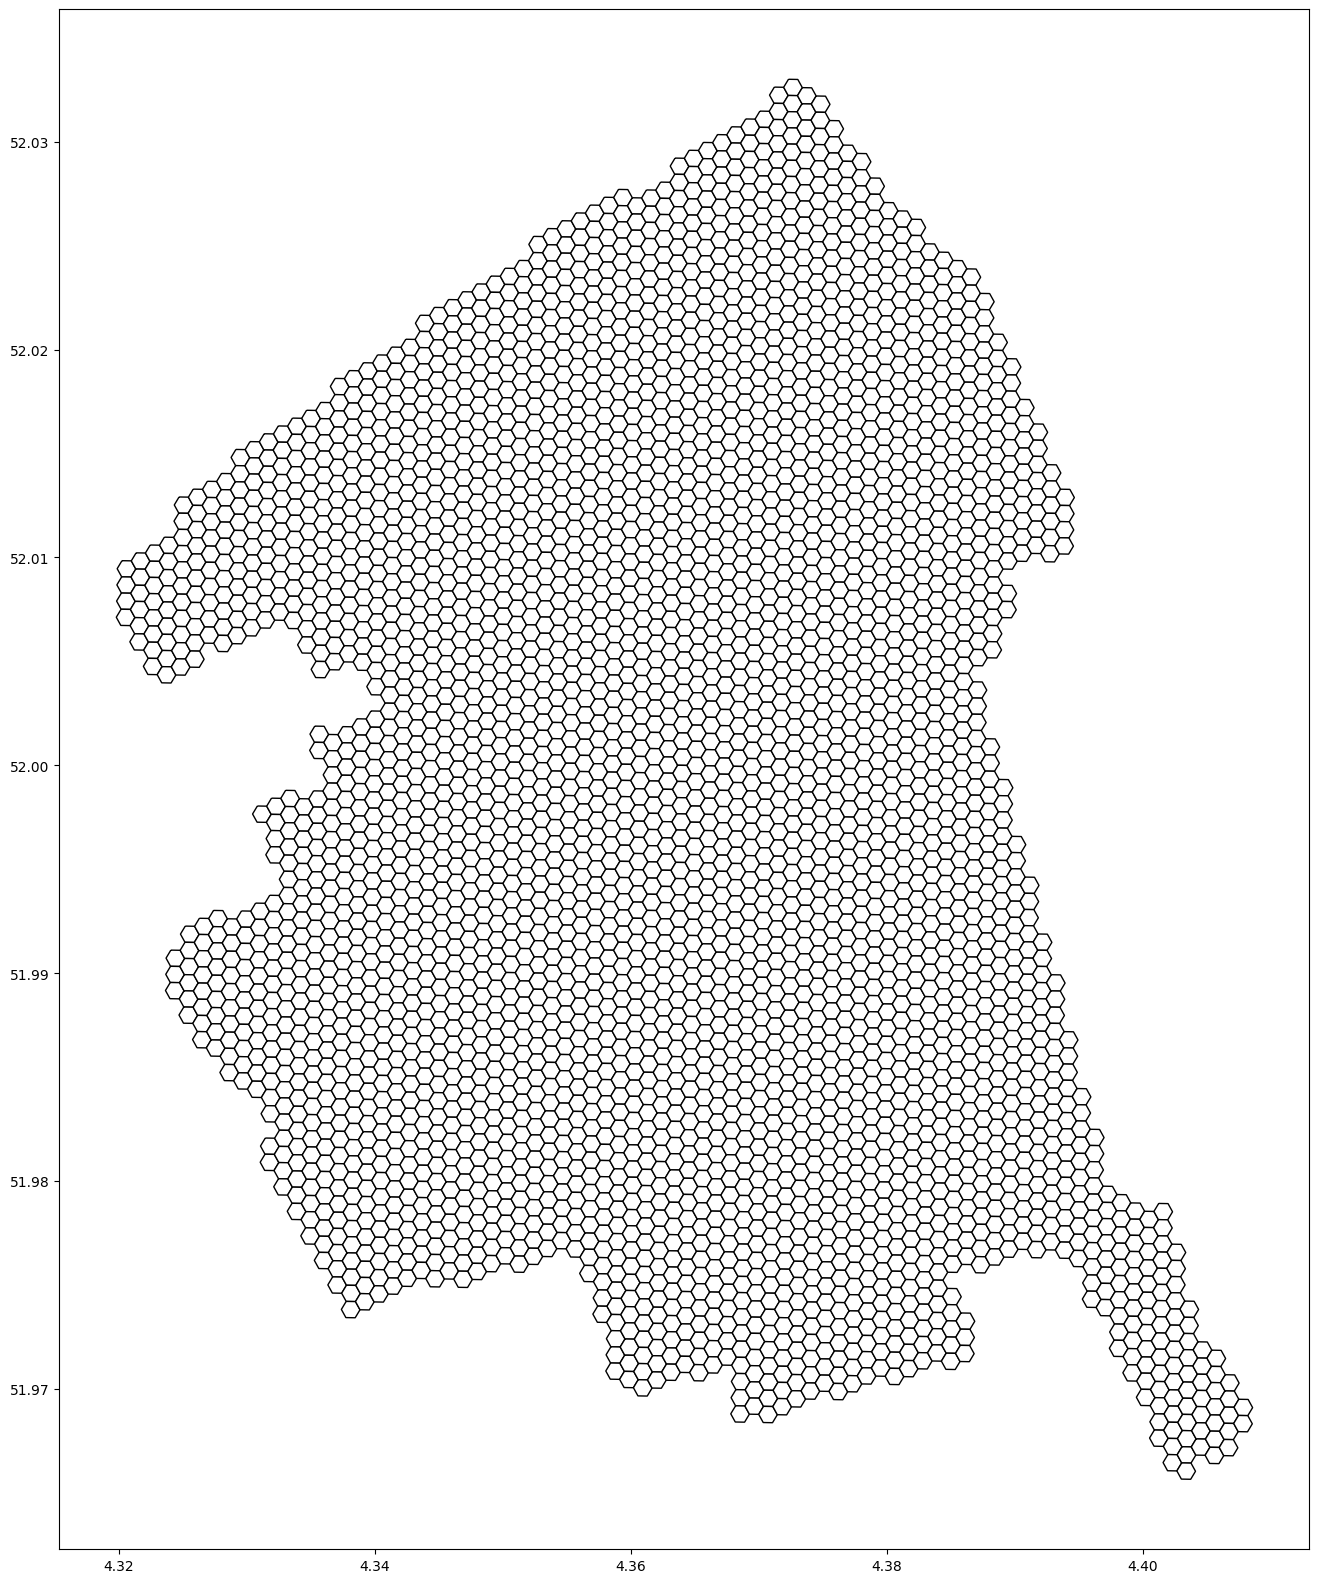

In [5]:
# Projections
cells.plot(figsize = (20,20), edgecolor = 'black', color = 'white')

In [6]:
network.head()

,level_0,level_1,u,v,key,geometry
0,11615,0,3478278140,6883764802,0,"LINESTRING (4.33834 51.97430, 4.33839 51.97431)"
1,11410,0,3366599995,3478278140,0,"LINESTRING (4.33839 51.97431, 4.33835 51.97435..."
2,11616,0,3478278140,6987075496,0,"LINESTRING (4.33908 51.97448, 4.33889 51.97443..."
3,11411,0,3366599995,6987075500,0,"LINESTRING (4.33905 51.97451, 4.33854 51.97441..."
4,14316,0,6987075496,6987075500,0,"LINESTRING (4.33905 51.97451, 4.33908 51.97448)"
